In [70]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [71]:
mipath = "australian.dat"
data = pd.read_csv(mipath, sep=" ",header=None)
data.columns = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","class"]
data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [72]:
#Particiones
X=data.iloc[:,:-1]#todas las lineas,todas las columnas, menos la ultima
y=data[["class"]]#solo class

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.6,random_state=45)

BOSQUE ALEATORIO

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)


/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_893/436068558.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


In [76]:
#score
rfc.score(X_test,y_test)

0.894927536231884

1. En un ciclo for el modelo base

/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_893/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_893/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_893/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_893/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Bosque aleatorio con párametros por default 
 Promedio y desviación estándar: 88.9% (0.8)


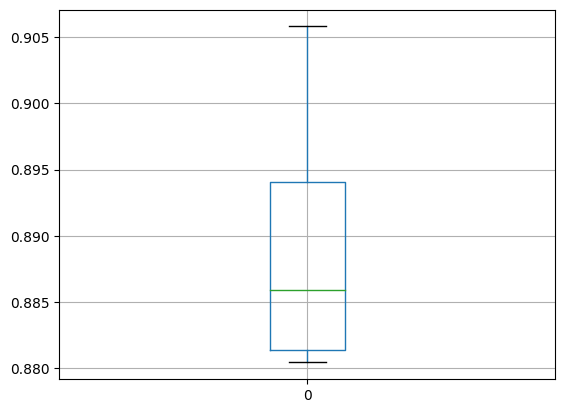

In [77]:
n_for = 10
accAD = list()

for k in range(n_for):
    
    modelo_AD = RandomForestClassifier()

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD.append(tmp)

print('Bosque aleatorio con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD),100*np.std(accAD)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [78]:
accAD

[0.8840579710144928,
 0.894927536231884,
 0.8913043478260869,
 0.8840579710144928,
 0.8985507246376812,
 0.8804347826086957,
 0.9057971014492754,
 0.8804347826086957,
 0.8804347826086957,
 0.8876811594202898]

2. En un ciclo for el modelo con hiper parámetros 

/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_893/2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_893/2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_893/2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_893/2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Bosque Aleatorio con párametros por default 
 Promedio y desviación estándar: 89.7% (0.4)


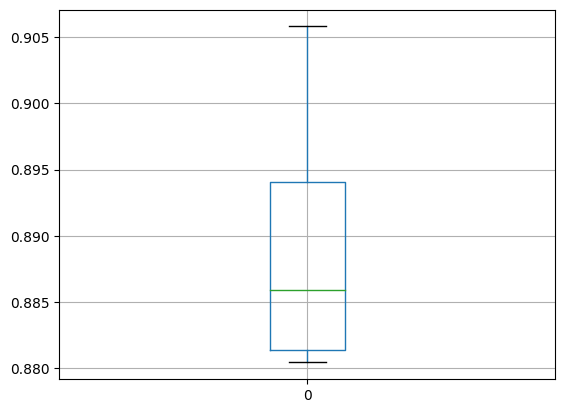

In [79]:
accAD2 = list()

for k in range(n_for):
    
    modelo_AD = RandomForestClassifier(n_estimators=100, # número de árboles aleatorios a generar para el bosque.
                                        criterion="gini", # función que se mide la calidad de cada división en cada nodo.
                                        max_depth=None, # profundidad máxima de cada árbol.
                                        min_samples_split=2, # mínimo de datos que debe haber en un nodo para continuar dividiéndolo.
                                        min_samples_leaf=1, # mínimo de datos que deben quedar en cada hoja después de cada división.
                                        max_features=12) # máximo de variables a seleccionar aleatoriamente en cada árbol del bosque.)

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD2.append(tmp)

print('Bosque Aleatorio con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD2),100*np.std(accAD2)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [80]:
accAD2

[0.8913043478260869,
 0.9021739130434783,
 0.894927536231884,
 0.9021739130434783,
 0.9021739130434783,
 0.8913043478260869,
 0.8913043478260869,
 0.8985507246376812,
 0.8985507246376812,
 0.894927536231884]

LINEAR SUPPORT VECTOR CLASSIFIER

In [81]:
from sklearn.svm import LinearSVC


In [82]:
#crear instancia
linear = LinearSVC()
#entrenamiento
linear.fit(X_train, y_train)
#score
linear.score(X_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6884057971014492

3. Graficar los boxplot, ambos que se muestren en la misma gráfica. 

In [83]:
ddff = pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])
ddff

,default,ajustado
0,0.884058,0.891304
1,0.894928,0.902174
2,0.891304,0.894928
3,0.884058,0.902174
4,0.898551,0.902174
5,0.880435,0.891304
6,0.905797,0.891304
7,0.880435,0.898551
8,0.880435,0.898551
9,0.887681,0.894928


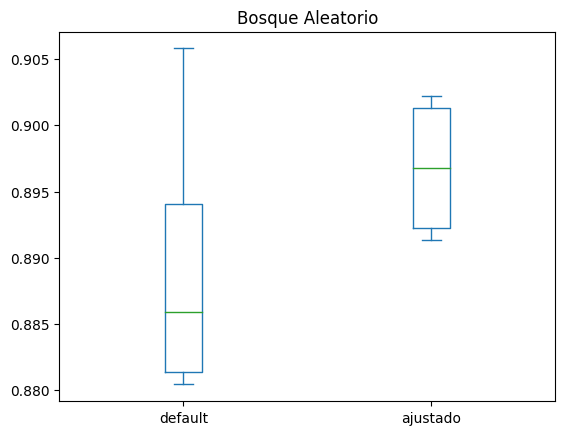

In [84]:
ddff.plot(kind='box')
plt.title('Bosque Aleatorio')
plt.show()

1. En un ciclo for el modelo base

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

LinearSVC con párametros por default 
 Promedio y desviación estándar: 79.1% (10.4)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

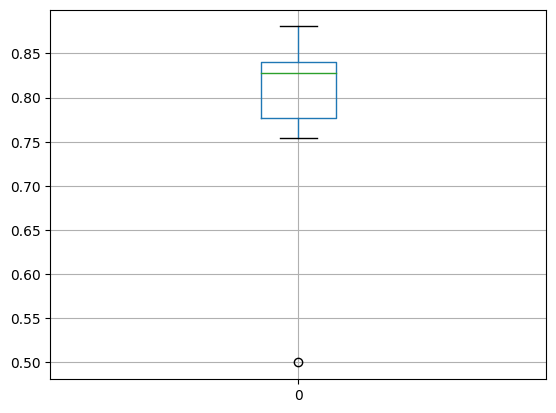

In [85]:
n_for = 10
accAD = list()

for k in range(n_for):
    
    modelo_AD = LinearSVC()

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD.append(tmp)

print('LinearSVC con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD),100*np.std(accAD)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [86]:
accAD

[0.8260869565217391,
 0.8369565217391305,
 0.8297101449275363,
 0.5,
 0.7536231884057971,
 0.8115942028985508,
 0.7644927536231884,
 0.8804347826086957,
 0.8405797101449275,
 0.8623188405797102]

2. En un ciclo for el modelo con hiper parámetros 

LinearSVC con párametros por default 
 Promedio y desviación estándar: 89.1% (0.0)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/uti

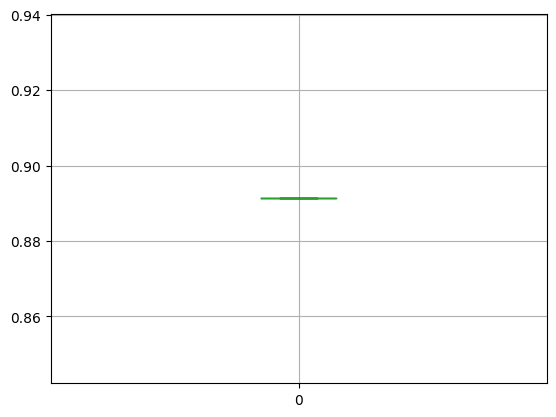

In [87]:
accAD2 = list()

for k in range(n_for):
    
    modelo_AD = LinearSVC(C= 0.1,
                          penalty = "l1",
                          dual=False)

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD2.append(tmp)

print('LinearSVC con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD2),100*np.std(accAD2)))

pd.DataFrame(accAD2).boxplot()
plt.show()

In [88]:
accAD2

[0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869]

3. Graficar los boxplot, ambos que se muestren en la misma gráfica. 

In [89]:
ddff = pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])
ddff

,default,ajustado
0,0.826087,0.891304
1,0.836957,0.891304
2,0.829710,0.891304
3,0.500000,0.891304
4,0.753623,0.891304
5,0.811594,0.891304
6,0.764493,0.891304
7,0.880435,0.891304
8,0.840580,0.891304
9,0.862319,0.891304


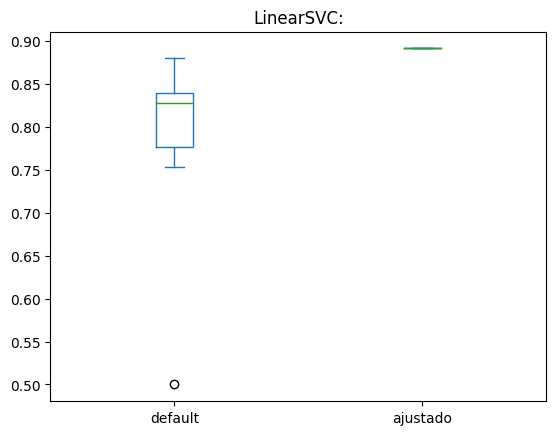

In [90]:
ddff.plot(kind='box')
plt.title('LinearSVC:')
plt.show()

4. ¿Qué modelo arroja mejores scores? 

El Bosque aleatorio arroja mejores scores, la diferencia es poca pero aumenta en un 0.01 en comparacion con el modelo LinearSVC